In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [2]:
classes=[]

In [3]:
def my_label(image_name):
    name=image_name.split('.')[-3]
    if name in classes:
        return classes.index(name)
    else:
        classes.append(name)
        return classes.index(name)

In [4]:
import os
from random import shuffle
from tqdm import tqdm

In [5]:
def my_data():
    data=[]
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(50,50))
        data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data    

In [6]:
data=my_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 845.61it/s]


In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

### spliting dataset

In [8]:
x=np.array([a[0] for a in data]).reshape(-1,50,50,1)
y=np.array([a[1] for a in data])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

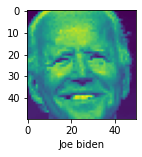

In [10]:
plot_sample(x_train,y_train,0)

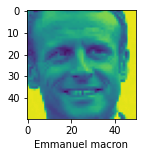

In [11]:
plot_sample(x_test,y_test,0)

In [12]:
#Normalizing the pixels of images
x_train=x_train/255.0
x_test=x_test/255.0

### Convolutional Neural Networks

In [13]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(50,50,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    
    layers.Dense(64,activation='relu'),
    
    layers.Dense(len(classes),activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.fit(x_train,y_train,epochs=10)
cnn.save('mymodel.h5')

Epoch 1/10
2/2 [==============================] - 2s 91ms/step - loss: 1.7784 - accuracy: 0.1458
Epoch 2/10
2/2 [==============================] - 0s 104ms/step - loss: 1.7193 - accuracy: 0.4167
Epoch 3/10
2/2 [==============================] - 0s 101ms/step - loss: 1.6064 - accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 111ms/step - loss: 1.4750 - accuracy: 0.4167
Epoch 5/10
2/2 [==============================] - 0s 106ms/step - loss: 1.2924 - accuracy: 0.7083
Epoch 6/10
2/2 [==============================] - 0s 115ms/step - loss: 1.0536 - accuracy: 0.8750
Epoch 7/10
2/2 [==============================] - 0s 103ms/step - loss: 0.8359 - accuracy: 0.9167
Epoch 8/10
2/2 [==============================] - 0s 112ms/step - loss: 0.6007 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 106ms/step - loss: 0.3726 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 98ms/step - loss: 0.2171 - accuracy: 1.0000


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=cnn.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [17]:
cnn.evaluate(x_test,y_test)

1/1 [==============================] - 0s 491ms/step - loss: 0.1679 - accuracy: 1.0000


[0.16794811189174652, 1.0]

In [18]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[7.07527448e-04, 9.63691533e-01, 6.21637190e-03, 3.02182059e-07,
        2.90661063e-02, 3.18207633e-04],
       [1.31410182e-01, 1.44948834e-03, 4.26344424e-02, 1.09822964e-02,
        8.90517083e-04, 8.12633097e-01],
       [7.07527448e-04, 9.63691533e-01, 6.21637190e-03, 3.02182059e-07,
        2.90661063e-02, 3.18207633e-04],
       [6.18095659e-02, 1.04919365e-02, 7.29565620e-01, 4.51038312e-03,
        7.15908362e-03, 1.86463371e-01],
       [1.92043722e-01, 1.64415560e-05, 7.49097764e-03, 7.75092959e-01,
        1.89382154e-05, 2.53368914e-02]], dtype=float32)

In [19]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 5, 1, 2, 3]

In [20]:
y_test[:5]

array([1, 5, 1, 2, 3])

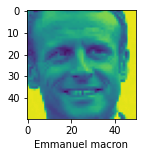

In [21]:
plot_sample(x_test,y_classes,0)

### predicting 

In [22]:
def predict_an_image(img):
    img=np.expand_dims(img,axis=0)
    r=cnn.predict(img)
    return classes[np.argmax(r)]

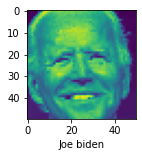

In [23]:
plot_sample(x_train,y_train,0)

In [24]:
predict_an_image(x_train[0])

'Joe biden'

In [25]:
face_classifier=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_cropped(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        cropped_face=img[y:y+h,x:x+w]
    return cropped_face

In [26]:
def predict(path):
    img_data=cv2.imread(path)
    img_data=face_cropped(img_data)
    img_data=cv2.cvtColor(img_data,cv2.COLOR_BGR2GRAY)
    img_data=cv2.resize(img_data,(50,50))
    img_data=img_data/255.0
    img_data=img_data.reshape(50,50,1)
    #plt.imshow(img_data)
    return predict_an_image(img_data)

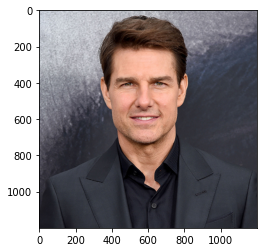

In [27]:
import matplotlib.image as mpimg
path=("C:/Users/binnu/Pictures/Camera Roll/cruise.jpg")
img=mpimg.imread(path)
plt.imshow(img)

In [28]:
predict(path)

'Tom cruise'

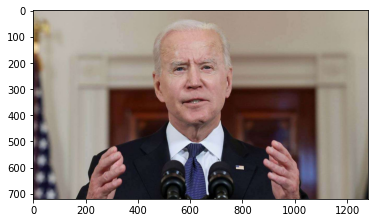

In [29]:
path=("C:/Users/binnu/Pictures/Camera Roll/joe_biden.jpg")
img=mpimg.imread(path)
plt.imshow(img)

In [30]:
predict(path)

'Joe biden'